In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('ex1data2.txt', delimiter=',')

In [3]:
def h(X, theta):
    return np.dot(X, theta)

In [4]:
def J(X, y, theta):
    m = 2 * len(y)
    loss = h(X, theta) - y
    return np.dot(loss.T, loss) / m

In [5]:
def gd(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        loss = h(X, theta) - y
        theta = theta - alpha * np.dot(X.T, loss) / m
        
        J_history[i] = J(X, y, theta)
    return theta, J_history

####  特征缩放

In [24]:
X = data[:, 0:2]
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = (X - mu) / sigma

In [26]:
y = data[:, 2]
X = np.append(np.ones((len(y), 1)), X, axis=1)
theta = np.zeros(3)
alpha = 0.01
num_iters = 400

In [27]:
theta, J_history= gd(X, y, theta, alpha, num_iters)

In [28]:
theta

array([334302.06399328,  99411.44947359,   3267.01285407])

In [36]:
x = [1650, 3]
x = (x - mu) / sigma
x = np.append(np.array([1]), x)
h(x, theta)

289221.5473712181

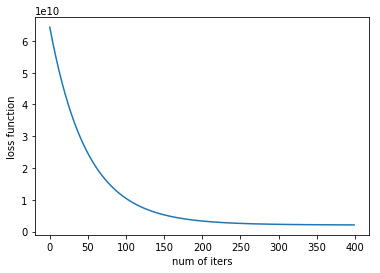

In [30]:
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('num of iters')
plt.ylabel('loss function')
plt.show()

#### 正规方程
$\theta = (X^TX)^{-1}X^Ty$

In [41]:
from numpy import linalg

y = data[:, 2]
X = data[:, 0:2]
X = np.append(np.ones((len(y), 1)), X, axis=1)
theta = np.dot(np.dot(linalg.inv(np.dot(X.T, X)), X.T), y)

In [42]:
theta

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [43]:
x = [1, 1650, 3]
h(x, theta)

293081.46433489426